In [5]:
# Project 2:
# Detect flowers based on images
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

## preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install opencv-python

In [8]:
X=[]
Z=[]
IMG_SIZE=150

FLOWER_DAISEY_DIR =r"C:\Users\user\Downloads\train-20240220T042936Z-001\train\daisy" 
FLOWER_SUNFLOWER_DIR =r"C:\Users\user\Downloads\train-20240220T042936Z-001\train\sunflower"
FLOWER_TULIP_DIR =r"C:\Users\user\Downloads\train-20240220T042936Z-001\train\tulip"
FLOWER_DANDI_DIR =r"C:\Users\user\Downloads\train-20240220T042936Z-001\train\dandelion"
FLOWER_ROSE_DIR = r"C:\Users\user\Downloads\train-20240220T042936Z-001\train\rose"

In [9]:
def assign_label(img, flower_type):
  return flower_type

In [10]:
# tqdm --> It creates a progress bar from the loop
def make_train_data(flower_type, DIR):
  for img in tqdm(os.listdir(DIR)):
    label = assign_label(img, flower_type)
    path = os.path.join(DIR, img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    X.append(np.array(img))
    Z.append(str(label))

In [11]:
make_train_data('Daisy', FLOWER_DAISEY_DIR)
print(len(X))

100%|██████████| 66/66 [00:00<00:00, 130.23it/s]

66


In [12]:
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 495/495 [00:03<00:00, 133.71it/s]

561


In [13]:
make_train_data('Dandelion', FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 656/656 [00:04<00:00, 160.21it/s]

1217


In [14]:
make_train_data('Tulip', FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 610/610 [00:04<00:00, 133.79it/s]

1827


In [15]:
make_train_data('Rose', FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 497/497 [00:03<00:00, 138.54it/s]

2324


C:\Users\user\AppData\Local\Temp\ipykernel_26908\3155540616.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


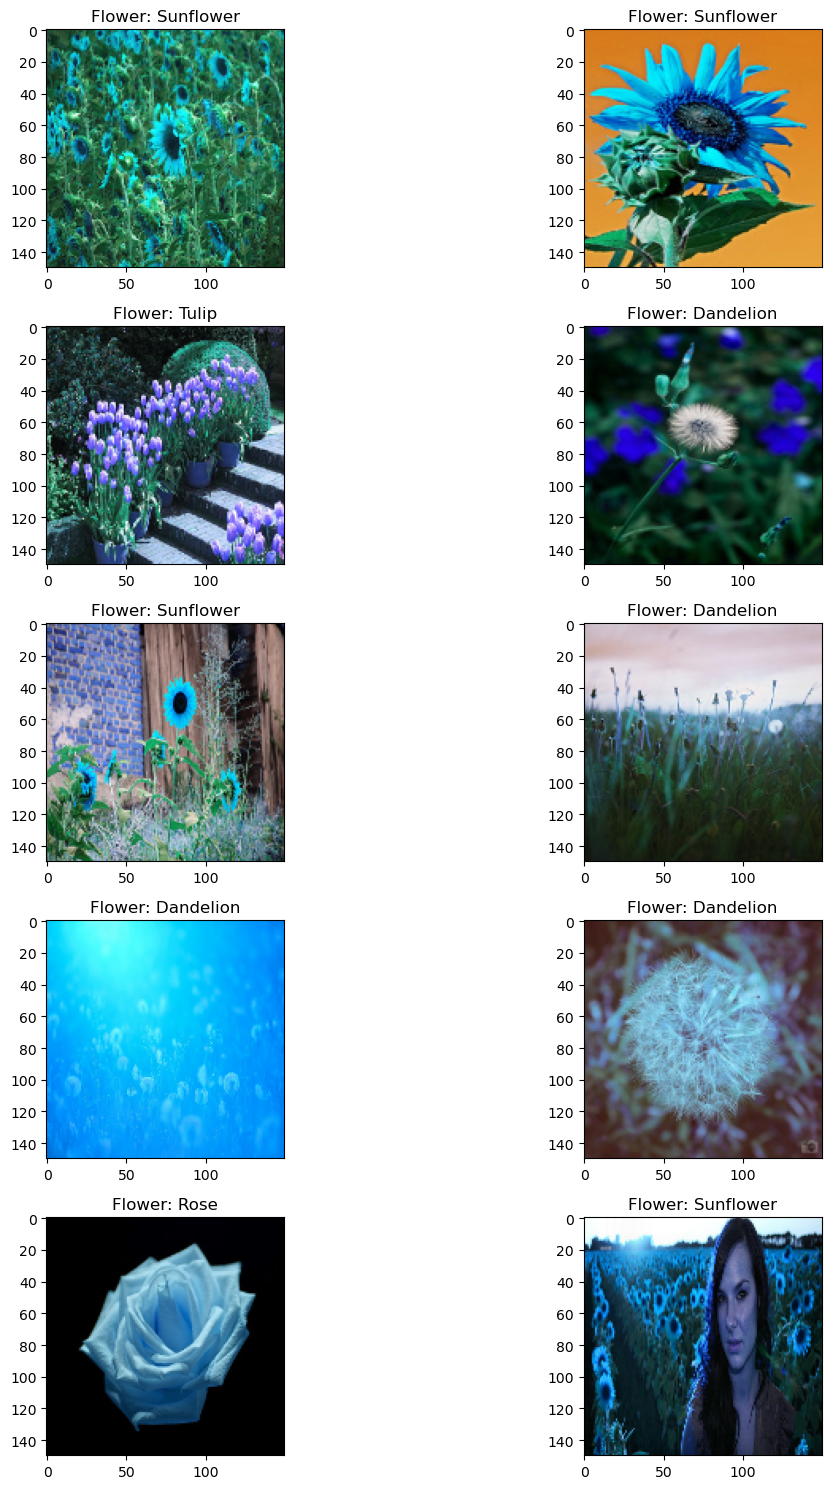

In [16]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for row in range(5):
  for col in range(2):
    l= rn.randint(0, len(Z))
    ax[row, col].imshow(X[l])
    ax[row, col].set_title("Flower: "+Z[l])

  plt.tight_layout()

In [20]:
#Encoding all the flower names
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255
#X-->contains all the image array
#Y--->contains all the image names

print(X)


[[[[3.44482891e-03 3.32179931e-03 3.30642061e-03]
   [3.38331411e-03 3.27566321e-03 3.21414840e-03]
   [3.47558631e-03 3.33717801e-03 3.29104191e-03]
   ...
   [2.15301807e-04 1.38408304e-04 1.38408304e-04]
   [2.61437908e-04 1.69165705e-04 1.84544406e-04]
   [1.84544406e-04 1.07650903e-04 1.23029604e-04]]

  [[3.46020761e-03 3.33717801e-03 3.32179931e-03]
   [3.55247982e-03 3.42945021e-03 3.39869281e-03]
   [3.44482891e-03 3.32179931e-03 3.30642061e-03]
   ...
   [2.30680507e-04 1.84544406e-04 1.99923106e-04]
   [1.99923106e-04 1.07650903e-04 1.38408304e-04]
   [1.84544406e-04 1.23029604e-04 1.07650903e-04]]

  [[3.61399462e-03 3.49096501e-03 3.49096501e-03]
   [3.55247982e-03 3.42945021e-03 3.38331411e-03]
   [3.52172241e-03 3.42945021e-03 3.41407151e-03]
   ...
   [2.46059208e-04 2.15301807e-04 2.15301807e-04]
   [1.99923106e-04 1.07650903e-04 1.38408304e-04]
   [1.23029604e-04 6.15148020e-05 4.61361015e-05]]

  ...

  [[2.79892349e-03 2.70665129e-03 2.72202999e-03]
   [2.89119569e-

In [21]:
#Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [22]:
print(Z)

['Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'S

In [23]:
#set random seed
np.random.seed(42)
rn.seed(42)

tf.random.set_seed(42)

In [24]:
#building the model
model = Sequential()


model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


# 1 2 3 4
# 5 6 7 8
# 9 10 11 12
# 13 14 15 16


#MaxPooling2D--->2x2

#6 8
#14 16


model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))



model.add(Conv2D(filters=96,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5,activation='softmax'))

In [31]:
model

In [32]:
#adjest the learning rate
batch_size=128
epochs=50
from keras.callbacks import ReduceLROnPlateau
red_lr=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0)

In [33]:
#to prevent overfitting
datagen=ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False)
datagen.fit(x_train)

In [34]:
#compile keras model
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 96)        0

In [161]:
# Fitting on training and making predictions
History=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                            epochs=epochs,validation_data=(x_test,y_test),
                            verbose=1,steps_per_epoch=x_train.shape[0]//batch_size)

C:\Users\user\AppData\Local\Temp\ipykernel_26908\2611857601.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),


Epoch 1/50
13/13 [==============================] - 39s 3s/step - loss: 1.1243 - accuracy: 0.5300 - val_loss: 1.0858 - val_accuracy: 0.5663
Epoch 2/50
13/13 [==============================] - 39s 3s/step - loss: 1.0920 - accuracy: 0.5418 - val_loss: 1.0819 - val_accuracy: 0.5628
Epoch 3/50
13/13 [==============================] - 38s 3s/step - loss: 1.0926 - accuracy: 0.5505 - val_loss: 1.0697 - val_accuracy: 0.5697
Epoch 4/50
13/13 [==============================] - 39s 3s/step - loss: 1.0800 - accuracy: 0.5523 - val_loss: 1.0479 - val_accuracy: 0.5904
Epoch 5/50
13/13 [==============================] - 38s 3s/step - loss: 1.0601 - accuracy: 0.5641 - val_loss: 1.0687 - val_accuracy: 0.5542
Epoch 6/50
13/13 [==============================] - 41s 3s/step - loss: 1.0503 - accuracy: 0.5529 - val_loss: 1.0614 - val_accuracy: 0.5697
Epoch 7/50
13/13 [==============================] - 57s 4s/step - loss: 1.0644 - accuracy: 0.5511 - val_loss: 1.0191 - val_accuracy: 0.6059
Epoch 8/50
13/13 [==

In [168]:
pip install bs4

In [2]:
from bs4 import BeautifulSoup
import requests

url="https://crawler-test.com/"
response=requests.get(url)
#print("The status code is",response.status_code)
#print(response.text[:50])

#To get the title
#?To access this site have to use this soup instance only
soup=BeautifulSoup(response.text,'html.parser')
print(soup.find('title').text)

#!To get the heading
heading=soup.find('h1')
print(heading)

#find(),findall()

Crawler Test Site
<h1>Crawler Test Site</h1>


In [3]:
print(soup.find('title'))

<title>Crawler Test Site</title>


In [4]:
#!To get the heading
heading=soup.find('h1')
print(heading)

<h1>Crawler Test Site</h1>


In [5]:
#!To get the heading
heading=soup.find('h1')
print(heading.text)

Crawler Test Site


In [6]:
#!To find the tag
links=soup.find('a')
print(links)

<a href="/" id="logo">Crawler Test <span class="neon-effect">two point oh!</span></a>


In [7]:
#!To find all the tags
links=soup.find_all
print(links)

<bound method Tag.find_all of <!DOCTYPE html>

<html>
<head>
<title>Crawler Test Site</title>
<meta content="en" http-equiv="content-language"/>
<link href="/css/app.css" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico?r=1.6" rel="icon" type="image/x-icon"/>
<script src="/bower_components/jquery/jquery.min.js" type="text/javascript"></script>
<meta content="Default description XIbwNE7SSUJciq0/Jyty" name="description"/>
<link href="https://m.crawler-test.com" media="only screen and (max-width: 640px)" rel="alternate"/>
<link href="https://crawler-test.com/links/alternate_media_handheld" media="handheld" rel="alternate"/>
<link href="https://crawler-test.com/links/alternate_media_print" media="print" rel="alternate"/>
<link href="https://crawler-test.com/links/alternate_type/rss_xml.xml" rel="alternate" title="RSS feed for this page" type="application/rss+xml"/>
<link href="https://crawler-test.com/links/alternate_type/atom_xml.atom" rel="alternate" title="Atom feed for this 

In [8]:
#!To find the tag
all_links=soup.find_all('a')
print("--------------------------------")
print(all_links)

--------------------------------
[<a href="/" id="logo">Crawler Test <span class="neon-effect">two point oh!</span></a>, <a href="/mobile/separate_desktop">Separate Desktop page with separate mobile and/or AMP</a>, <a href="/mobile/desktop_with_AMP_as_mobile">Separate Desktop page with AMP page as AMP and Mobile</a>, <a href="/mobile/separate_desktop_with_different_h1">Separate Desktop with different H1</a>, <a href="/mobile/separate_desktop_with_different_title">Separate Desktop with different title</a>, <a href="/mobile/separate_desktop_with_different_wordcount">Separate Desktop with different wordcount</a>, <a href="/mobile/separate_desktop_with_different_links_in">Separate Desktop with different links in</a>, <a href="/mobile/separate_desktop_with_different_links_out">Separate Desktop with different links out</a>, <a href="/mobile/separate_desktop_with_mobile_not_subdomain">Separate Desktop which links to a mobile page not on the mobile subdomain</a>, <a href="/mobile/desktop_with_

In [9]:
#!To find the tag
all_links=soup.find_all('a')
print("--------------------------------")
#print(all_links)
for val in all_links:
    print(val)
    print()

--------------------------------
<a href="/" id="logo">Crawler Test <span class="neon-effect">two point oh!</span></a>

<a href="/mobile/separate_desktop">Separate Desktop page with separate mobile and/or AMP</a>

<a href="/mobile/desktop_with_AMP_as_mobile">Separate Desktop page with AMP page as AMP and Mobile</a>

<a href="/mobile/separate_desktop_with_different_h1">Separate Desktop with different H1</a>

<a href="/mobile/separate_desktop_with_different_title">Separate Desktop with different title</a>

<a href="/mobile/separate_desktop_with_different_wordcount">Separate Desktop with different wordcount</a>

<a href="/mobile/separate_desktop_with_different_links_in">Separate Desktop with different links in</a>

<a href="/mobile/separate_desktop_with_different_links_out">Separate Desktop with different links out</a>

<a href="/mobile/separate_desktop_with_mobile_not_subdomain">Separate Desktop which links to a mobile page not on the mobile subdomain</a>

<a href="/mobile/desktop_with_s

In [10]:
#!to find the element by ID
head=soup.find(id='header')
print(head)

<div id="header">
<a href="/" id="logo">Crawler Test <span class="neon-effect">two point oh!</span></a>
<div style="position:absolute;right:520px;top:-4px;"></div>
</div>


In [11]:
a=head.find('a')
print(a)

<a href="/" id="logo">Crawler Test <span class="neon-effect">two point oh!</span></a>


In [12]:
# TO find the element based on class
class_based=soup.find(class_="row side-collapsed")
print(class_based)

<div class="row side-collapsed">
<div class="large-4 columns">
<div class="panel">
<div class="panel-header">
<h3>Mobile</h3>
</div>
<a href="/mobile/separate_desktop">Separate Desktop page with separate mobile and/or AMP</a>
<br/>
<a href="/mobile/desktop_with_AMP_as_mobile">Separate Desktop page with AMP page as AMP and Mobile</a>
<br/>
<a href="/mobile/separate_desktop_with_different_h1">Separate Desktop with different H1</a>
<br/>
<a href="/mobile/separate_desktop_with_different_title">Separate Desktop with different title</a>
<br/>
<a href="/mobile/separate_desktop_with_different_wordcount">Separate Desktop with different wordcount</a>
<br/>
<a href="/mobile/separate_desktop_with_different_links_in">Separate Desktop with different links in</a>
<br/>
<a href="/mobile/separate_desktop_with_different_links_out">Separate Desktop with different links out</a>
<br/>
<a href="/mobile/separate_desktop_with_mobile_not_subdomain">Separate Desktop which links to a mobile page not on the mobil

In [13]:
soup=BeautifulSoup(response.text,'html.parser')
print(soup.find('h3').text)

Mobile


In [14]:
soup=BeautifulSoup(response.text,'html.parser')
print(soup.find('h3'))

<h3>Mobile</h3>


In [15]:
soup=BeautifulSoup(response.text,'html.parser')
print(soup.find('h3').text)

Mobile


In [16]:
a=soup.find_all('h3')
for val in a:
    print(val.text)

Mobile
Description Tags
Encoding
Titles
Robots Protocol
Redirects
Links
URLs
Canonical Tags
Status Codes
Social Tags
Content
Other


In [17]:
a=soup.find_all('h3')
print(a)

[<h3>Mobile</h3>, <h3>Description Tags</h3>, <h3>Encoding</h3>, <h3>Titles</h3>, <h3>Robots Protocol</h3>, <h3>Redirects</h3>, <h3>Links</h3>, <h3>URLs</h3>, <h3>Canonical Tags</h3>, <h3>Status Codes</h3>, <h3>Social Tags</h3>, <h3>Content</h3>, <h3>Other</h3>]


In [18]:
a=soup.find_all('h3')
import numpy as np
print(np.array(a))

[['Mobile']
 ['Description Tags']
 ['Encoding']
 ['Titles']
 ['Robots Protocol']
 ['Redirects']
 ['Links']
 ['URLs']
 ['Canonical Tags']
 ['Status Codes']
 ['Social Tags']
 ['Content']
 ['Other']]


In [19]:
#!headings
headings=soup.find_all('div',{'class':'panel-header'})
print(headings)

[<div class="panel-header">
<h3>Mobile</h3>
</div>, <div class="panel-header">
<h3>Description Tags</h3>
</div>, <div class="panel-header">
<h3>Encoding</h3>
</div>, <div class="panel-header">
<h3>Titles</h3>
</div>, <div class="panel-header">
<h3>Robots Protocol</h3>
</div>, <div class="panel-header">
<h3>Redirects</h3>
</div>, <div class="panel-header">
<h3>Links</h3>
</div>, <div class="panel-header">
<h3>URLs</h3>
</div>, <div class="panel-header">
<h3>Canonical Tags</h3>
</div>, <div class="panel-header">
<h3>Status Codes</h3>
</div>, <div class="panel-header">
<h3>Social Tags</h3>
</div>, <div class="panel-header">
<h3>Content</h3>
</div>, <div class="panel-header">
<h3>Other</h3>
</div>]


In [20]:

for val in headings:
    print(val)

<div class="panel-header">
<h3>Mobile</h3>
</div>
<div class="panel-header">
<h3>Description Tags</h3>
</div>
<div class="panel-header">
<h3>Encoding</h3>
</div>
<div class="panel-header">
<h3>Titles</h3>
</div>
<div class="panel-header">
<h3>Robots Protocol</h3>
</div>
<div class="panel-header">
<h3>Redirects</h3>
</div>
<div class="panel-header">
<h3>Links</h3>
</div>
<div class="panel-header">
<h3>URLs</h3>
</div>
<div class="panel-header">
<h3>Canonical Tags</h3>
</div>
<div class="panel-header">
<h3>Status Codes</h3>
</div>
<div class="panel-header">
<h3>Social Tags</h3>
</div>
<div class="panel-header">
<h3>Content</h3>
</div>
<div class="panel-header">
<h3>Other</h3>
</div>


In [21]:
for val in headings:
    h3=val.find('h3')
    print(h3.text)

Mobile
Description Tags
Encoding
Titles
Robots Protocol
Redirects
Links
URLs
Canonical Tags
Status Codes
Social Tags
Content
Other


In [22]:
#To get the links from Description Tags
desc=soup.find_all(class_="panel")
print(desc)

[<div class="panel">
<div class="panel-header">
<h3>Mobile</h3>
</div>
<a href="/mobile/separate_desktop">Separate Desktop page with separate mobile and/or AMP</a>
<br/>
<a href="/mobile/desktop_with_AMP_as_mobile">Separate Desktop page with AMP page as AMP and Mobile</a>
<br/>
<a href="/mobile/separate_desktop_with_different_h1">Separate Desktop with different H1</a>
<br/>
<a href="/mobile/separate_desktop_with_different_title">Separate Desktop with different title</a>
<br/>
<a href="/mobile/separate_desktop_with_different_wordcount">Separate Desktop with different wordcount</a>
<br/>
<a href="/mobile/separate_desktop_with_different_links_in">Separate Desktop with different links in</a>
<br/>
<a href="/mobile/separate_desktop_with_different_links_out">Separate Desktop with different links out</a>
<br/>
<a href="/mobile/separate_desktop_with_mobile_not_subdomain">Separate Desktop which links to a mobile page not on the mobile subdomain</a>
<br/>
<a href="/mobile/desktop_with_self_canon

In [23]:
desc=soup.find_all(class_="panel")
print(desc[1])

<div class="panel">
<div class="panel-header">
<h3>Description Tags</h3>
</div>
<a href="/description_tags/description_with_whitespace">Description Tag With Whitespace</a>
<br/>
<a href="/description_tags/missing_description">Description Tag Missing</a>
<br/>
<a href="/description_tags/no_description_nosnippet">Description Tag Missing With Meta Nosnippet</a>
<br/>
<a href="/description_tags/duplicate_description">Description Tag Duplicate</a>
<br/>
<a href="/description_tags/duplicate_description/foo">Description Tag Duplicate</a>
<br/>
<a href="/description_tags/duplicate_description_and_noindex">Noindex and Description Tag Duplicate</a>
<br/>
<a href="/description_tags/duplicate_description_and_noindex/foo">Noindex and Description Tag Duplicate</a>
<br/>
<a href="/description_tags/description_over_max">Description Tag Too Long</a>
<br/>
<a href="/description_tags/short_meta_description">Short Meta Description</a>
<br/>
<a href="/description_tags/description_http_equiv">HTTP-equiv des

In [24]:
desc=soup.find_all(class_="panel")
description_data=(desc[1])
print(description_data.find('a'))

<a href="/description_tags/description_with_whitespace">Description Tag With Whitespace</a>


In [25]:
desc=soup.find_all(class_="panel")
description_data=(desc[1])
print(description_data.find_all('a'))

[<a href="/description_tags/description_with_whitespace">Description Tag With Whitespace</a>, <a href="/description_tags/missing_description">Description Tag Missing</a>, <a href="/description_tags/no_description_nosnippet">Description Tag Missing With Meta Nosnippet</a>, <a href="/description_tags/duplicate_description">Description Tag Duplicate</a>, <a href="/description_tags/duplicate_description/foo">Description Tag Duplicate</a>, <a href="/description_tags/duplicate_description_and_noindex">Noindex and Description Tag Duplicate</a>, <a href="/description_tags/duplicate_description_and_noindex/foo">Noindex and Description Tag Duplicate</a>, <a href="/description_tags/description_over_max">Description Tag Too Long</a>, <a href="/description_tags/short_meta_description">Short Meta Description</a>, <a href="/description_tags/description_http_equiv">HTTP-equiv description</a>]


In [26]:
desc=soup.find_all(class_="panel")
description_data=(desc[1])
for val in description_data.find_all('a'):
    print(val)

<a href="/description_tags/description_with_whitespace">Description Tag With Whitespace</a>
<a href="/description_tags/missing_description">Description Tag Missing</a>
<a href="/description_tags/no_description_nosnippet">Description Tag Missing With Meta Nosnippet</a>
<a href="/description_tags/duplicate_description">Description Tag Duplicate</a>
<a href="/description_tags/duplicate_description/foo">Description Tag Duplicate</a>
<a href="/description_tags/duplicate_description_and_noindex">Noindex and Description Tag Duplicate</a>
<a href="/description_tags/duplicate_description_and_noindex/foo">Noindex and Description Tag Duplicate</a>
<a href="/description_tags/description_over_max">Description Tag Too Long</a>
<a href="/description_tags/short_meta_description">Short Meta Description</a>
<a href="/description_tags/description_http_equiv">HTTP-equiv description</a>


In [27]:
desc=soup.find_all(class_="panel")
description_data=(desc[1])
for val in description_data.find_all('a'):
    print(val.get('href'))

/description_tags/description_with_whitespace
/description_tags/missing_description
/description_tags/no_description_nosnippet
/description_tags/duplicate_description
/description_tags/duplicate_description/foo
/description_tags/duplicate_description_and_noindex
/description_tags/duplicate_description_and_noindex/foo
/description_tags/description_over_max
/description_tags/short_meta_description
/description_tags/description_http_equiv


In [28]:
print(desc)

[<div class="panel">
<div class="panel-header">
<h3>Mobile</h3>
</div>
<a href="/mobile/separate_desktop">Separate Desktop page with separate mobile and/or AMP</a>
<br/>
<a href="/mobile/desktop_with_AMP_as_mobile">Separate Desktop page with AMP page as AMP and Mobile</a>
<br/>
<a href="/mobile/separate_desktop_with_different_h1">Separate Desktop with different H1</a>
<br/>
<a href="/mobile/separate_desktop_with_different_title">Separate Desktop with different title</a>
<br/>
<a href="/mobile/separate_desktop_with_different_wordcount">Separate Desktop with different wordcount</a>
<br/>
<a href="/mobile/separate_desktop_with_different_links_in">Separate Desktop with different links in</a>
<br/>
<a href="/mobile/separate_desktop_with_different_links_out">Separate Desktop with different links out</a>
<br/>
<a href="/mobile/separate_desktop_with_mobile_not_subdomain">Separate Desktop which links to a mobile page not on the mobile subdomain</a>
<br/>
<a href="/mobile/desktop_with_self_canon

In [29]:
desc=soup.find_all(class_="panel")
description_data=(desc[1])
desc

[<div class="panel">
 <div class="panel-header">
 <h3>Mobile</h3>
 </div>
 <a href="/mobile/separate_desktop">Separate Desktop page with separate mobile and/or AMP</a>
 <br/>
 <a href="/mobile/desktop_with_AMP_as_mobile">Separate Desktop page with AMP page as AMP and Mobile</a>
 <br/>
 <a href="/mobile/separate_desktop_with_different_h1">Separate Desktop with different H1</a>
 <br/>
 <a href="/mobile/separate_desktop_with_different_title">Separate Desktop with different title</a>
 <br/>
 <a href="/mobile/separate_desktop_with_different_wordcount">Separate Desktop with different wordcount</a>
 <br/>
 <a href="/mobile/separate_desktop_with_different_links_in">Separate Desktop with different links in</a>
 <br/>
 <a href="/mobile/separate_desktop_with_different_links_out">Separate Desktop with different links out</a>
 <br/>
 <a href="/mobile/separate_desktop_with_mobile_not_subdomain">Separate Desktop which links to a mobile page not on the mobile subdomain</a>
 <br/>
 <a href="/mobile/des

In [49]:
l1=[]
for val in description_data.find_all('a'):
    str1 = "https://crawler.test.com"+str(val['href'])
    l1.append(str1)

In [50]:
with open('links.txt','w') as f1:
    for val in range(len(l1)):
        f1.write(str(l1[val]+'\n'))
f1.close()